# Generative Adversarial Networks
## Why GANs?

## What is Adversarial?
![indiana](https://media.giphy.com/media/tivaSkhu8MbKM/giphy.gif)

$\min_{\text{boulder}}\max_{\text{indiana}} V(\text{indiana}, \text{boulder}) = \text{distance between them}$


Estimating generative models via an adversarial process, in which we simultaneously train two models: a generative model $G$ that captures the data distribution, and a discriminative model $D$ that estimates the probability that a sample came from the training data rather than $G$ (cite Goodfellow2014)

![overviewgan](../images/overview.png "https://arxiv.org/pdf/1710.07035.pdf")

Image from Creswell, A., White, T., Dumoulin, V., Arulkumaran, K., Sengupta, B. and Bharath, A.A., 2018. Generative adversarial networks: An overview. IEEE Signal Processing Magazine, 35(1), pp.53-65.


## Basic Notations

- $x$ will be the **data element**.
- $D(x)$ is the discriminator network which outputs the **probability that $x$ is real or generated**. $D(x)$ should be high when $x$ comes from training data and low when $x$ comes from the generator.
- $z$ will be a **latent space vector** sampled from a normal distribution. $G(z)$ represents the generator function that which maps the latent vector $z$ to data-space. 
- The goal of $G$ is to estimate the distribution that the training data comes from ($p_{data}$) so it can generate fake samples from that estimated distribution ($p_g$).
- $D(G(z))$ is the probability that the output of the generator $G$ is a real image. $D$ tries to **maximize the probability it correctly classifies reals and fakes** ($\log D(x)$), and $G$ tries to **minimize the probability that $D$ will predict its outputs are fake** $(\log (1 - D(G(x))$)

$\underset{G}{\text{min}} \underset{D}{\text{max}}V(D,G) = \mathbb{E}_{x\sim p_{data}(x)}\big[logD(x)\big] + \mathbb{E}_{z\sim p_{z}(z)}\big[log(1-D(G(x)))\big]$

![overviewgan](../images/datadist.png "https://arxiv.org/pdf/1710.07035.pdf")

During GAN training, the generator is encouraged to produce a distribution of samples, $p_g(x)$ to match that of real data $p_{data}(x)$.

In theory, the solution to this minimax game is where $p_g=p_{data}$, and the discriminator guesses randomly if the inputs are real or fake. However, the convergence theory of GANs is still being actively researched and in reality models do not always train to this point.

## Main Loop of GANs training

![overviewgan](../images/mainloop.png "https://arxiv.org/pdf/1710.07035.pdf")

## How to Develop Deep Learning Models with Pytorch?

### Type of Layers
**Conv Layers**

In the convolution layers, the units are organized in feature maps, in which each unit is connected to local patches of the feature maps belonging to the previous layer through a set of weights, called filter bank. All units within a feature map share the same filter bank, different feature maps within the same layer use different filter banks, the arrangement of these has two justifications, on the one hand, data in form of arrays, as in our case, images, local subsets tend to be highly correlated and on the other hand the local statistics of images are invariant to their location.
![conv](https://github.com/celiacintas/star_wars_hackathon/raw/8d46effee4e4a82429eb989f017a31c03a6bc2fd/images/Convolution_schematic.gif)

Image from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/

In [3]:
from torch import nn

nn.Conv2d?


Init signature:
nn.Conv2d(
    in_channels,
    out_channels,
    kernel_size,
    stride=1,
    padding=0,
    dilation=1,
    groups=1,
    bias=True,
    padding_mode='zeros',
)
Docstring:     
Applies a 2D convolution over an input signal composed of several input
planes.

In the simplest case, the output value of the layer with input size
:math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
can be precisely described as:

.. math::
    \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
    \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)


where :math:`\star` is the valid 2D `cross-correlation`_ operator,
:math:`N` is a batch size, :math:`C` denotes a number of channels,
:math:`H` is a height of input planes in pixels, and :math:`W` is
width in pixels.

* :attr:`stride` controls the stride for the cross-correlation, a single
  number or a tuple.

* :attr:`padding` cont

In [14]:
conv = nn.Conv2d(128, 64, 4, 2, 1)

**MaxPooling**

To reduce the dimensionality of feature maps, a pooling layer is located between the convolution layers. The pooling layers eliminate the non-maximum values by calculating an aggregation function, usually using maximum or average on small input regions. The main goal of these layers is to reduce the computational cost in subsequent layers by reducing the size of future feature maps and providing a form of translational invariance.
![max](https://github.com/celiacintas/star_wars_hackathon/raw/8d46effee4e4a82429eb989f017a31c03a6bc2fd/images/maxpool.jpg)

Image from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/

- BatchNorm 
- UpSampling/ConvTranspose2d


### Optimization & Loss
To take this search for the minimum error to practice we use **Stochastic Gradient Descent**, it consists of showing the input vectors of a subset of training data, compute the outputs, their errors, calculate the gradient for those examples and adjust the weights accordingly. This process is repeated over several subsets of examples until the objective function average stops decreasing.

**explain ADAM**

![alt text](https://github.com/celiacintas/star_wars_hackathon/raw/8d46effee4e4a82429eb989f017a31c03a6bc2fd/images/saddle_point_evaluation_optimizers.gif)

 Check out  http://sebastianruder.com/optimizing-gradient-descent/

In [6]:
from torch import optim
[x for x in dir(optim) if '__' not in x]

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 'lr_scheduler']

In [15]:
G_optimizer = optim.Adam(conv.parameters(),
                         lr=0.0002, betas=(0.5, 0.999))

#### Different types of Loss implemented in PyTorch
**Binary Cross Entropy**
criterion that measures the Binary Cross Entropy between the target and the output, the loss can be defined as:

$\ell(x, y)=L=\left\{l_{1}, \ldots, l_{N}\right\}^{\top}, \quad l_{n}=-w_{n}\left[y_{n} \cdot \log x_{n}+\left(1-y_{n}\right) \cdot \log \left(1-x_{n}\right)\right]$

Where ...

In [17]:
[x for x in dir(nn) if x.endswith('Loss')]

['AdaptiveLogSoftmaxWithLoss',
 'BCELoss',
 'BCEWithLogitsLoss',
 'CTCLoss',
 'CosineEmbeddingLoss',
 'CrossEntropyLoss',
 'HingeEmbeddingLoss',
 'KLDivLoss',
 'L1Loss',
 'MSELoss',
 'MarginRankingLoss',
 'MultiLabelMarginLoss',
 'MultiLabelSoftMarginLoss',
 'MultiMarginLoss',
 'NLLLoss',
 'PoissonNLLLoss',
 'SmoothL1Loss',
 'SoftMarginLoss',
 'TripletMarginLoss']

In [13]:
loss = nn.BCELoss()

### Data loading and transformations

In [25]:
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms as tfs
from torch.utils import data

In [36]:
ts_list = [tfs.RandomAffine(0., scale=(0.75, 1.), fillcolor=0),
           tfs.Resize((32, 32)),
           tfs.Grayscale(1)]

In [65]:
imagenet_data = datasets.ImageFolder('../data/egyptian_text/',
                                     transform=tfs.Compose(ts_list))

data_loader = data.DataLoader(imagenet_data, batch_size=32, shuffle=True)

In [66]:
import matplotlib.pyplot as plt
import numpy as np

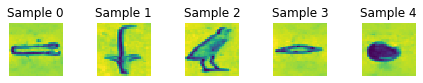

In [71]:
### visualize a few samples

fig = plt.figure()

for i in range(len(imagenet_data)):
    sample = imagenet_data[i + 10]
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    plt.imshow(np.asarray(sample[0]))
    # print(np.asarray(sample[0]))
    ax.set_title('Sample {}'.format(i))
    ax.axis('off')

    if i == 4:
        plt.show()
        break

### Evaluation and Visualization

## Hands-on 